<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

# Caos: Primera parte

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción a largo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [1]:
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [2]:
from sympy import *
x = Symbol("x")
r = Symbol("r")
fijo = Eq(x, 1-1/r)
fijo.rhs.subs(r,2)

1/2

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [3]:
Eq(Derivative(r*x*(1-x),x).doit().subs(x,fijo.rhs),1).simplify()

Eq(r, 1)

In [4]:
Eq(Derivative(r*x*(1-x),x).doit().subs(x,fijo.rhs),-1).simplify()

Eq(r, 3)

In [5]:
simplify(Eq(abs(diff(r*x*(1- x), x)).subs(x, 1 - 1/r),1))

Eq(Abs(r - 2), 1)

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_ ?¿Está cerca de los puntos fijos?
</div>

In [12]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
def logistic_map_recursivo(x, r, n=20): 
    if n == 1: 
        calculo = logistic_map(x,r)
    else: 
        calculo = logistic_map(logistic_map_recursivo(x, r, n-1), r)
    return calculo

        

In [13]:
logistic_map_recursivo(.5,2,20)

0.5

In [14]:
interact(logistic_map_recursivo,r=(0,4, .1), x=(0,1,.1))


interactive(children=(FloatSlider(value=0.0, description='x', max=1.0), FloatSlider(value=2.0, description='r'…

<function __main__.logistic_map_recursivo(x, r, n=20)>

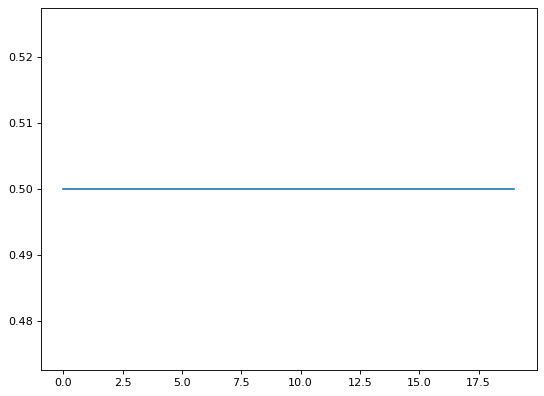

In [15]:
def log_plot(x, r, n = 20): 
    y = []
    for i in range(n):
        y.append(logistic_map_recursivo(x, r, i+1))
    plt.figure(figsize = (8,6), dpi = 80)
    plt.plot(range(n),y)

    
log_plot(.5, 2)

In [16]:
interact(log_plot,x=(0,1,.1), r=(0,4,.1))


interactive(children=(FloatSlider(value=0.0, description='x', max=1.0), FloatSlider(value=2.0, description='r'…

<function __main__.log_plot(x, r, n=20)>

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

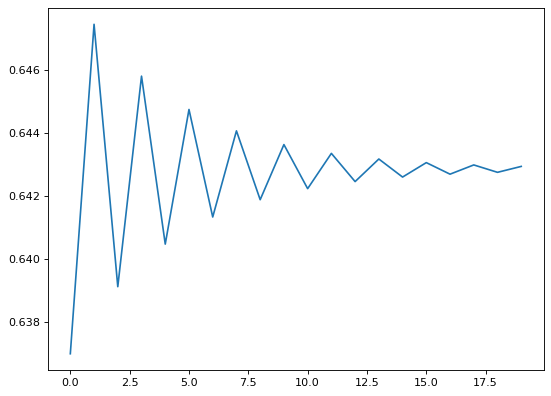

In [17]:
log_plot(.35,2.8)

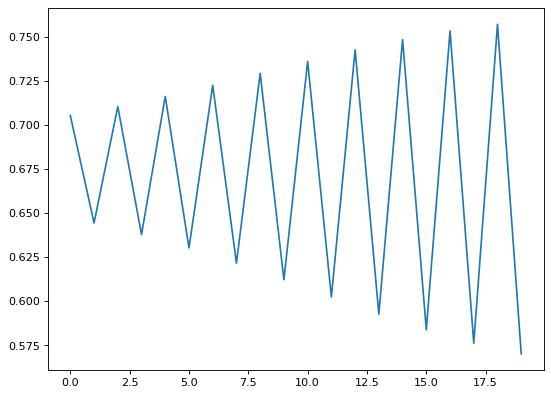

In [18]:
log_plot(.35,3.1)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [19]:
def iterar(g, x, n, r):
    if n == 1: 
        calculo = g(x,r)
    else: 
        calculo = g(iterar(g, x, n-1, r), r)
    return calculo

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [22]:
def iterarLista(g, x, n, r):
    y = [x]
    for i in range(n):
        y.append(iterar(g,x, i+1, r))
    print(y)
    return y

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [23]:
𝑟=[0.8,1.2,2.8,3.2]
for i in r:
    iterarLista(logistic_map, .1, 20, i)

[0.1, 0.07200000000000002, 0.053452800000000016, 0.04047647853772801, 0.031070506578330284, 0.024084104159436976, 0.018803248069019493, 0.014759748744859528, 0.011633518849478518, 0.009198544070925876, 0.007291144686320888, 0.005790387116387219, 0.004605486826743676, 0.0036674210542658936, 0.002923176861661297, 0.002331705518957396, 0.0018610149346642076, 0.0014860412464617315, 0.0011870663423004368, 0.0009485257726395314, 0.000758100857198536]
[0.1, 0.108, 0.11560319999999999, 0.12268692017971199, 0.12916180775583477, 0.13497484220769546, 0.14010796101444378, 0.14457326432978265, 0.14840620268497612, 0.15165816202752228, 0.1543895567015473, 0.15666410577965642, 0.15854455648790045, 0.16008981611514647, 0.16135328026963808, 0.16238207905903887, 0.16321696735140348, 0.16389262670401725, 0.16443820033928988, 0.16487793433015852, 0.16523184132141414]
[0.1, 0.252, 0.5277888000000001, 0.697837791264768, 0.5904085833729387, 0.6771136065469955, 0.612166157052565, 0.664772508993766, 0.62398005

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [56]:
def logistic_map(x,r):
    return r*x*(1-x)

In [57]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
import numpy as np

In [119]:
def CobWeb (g,x, r, n=20):
    X = [x, x]
    Y = [x]
    for i in range(1,n,2):
        aux = g(X[i], r)
        Y.append(aux)
        X.append(aux)
        Y.append(aux)
        X.append(aux)
    X.pop()
    #Graficamos la funcion inicial y la identidad
    plt.figure(figsize=(10, 8), dpi=80)
    ejeX = np.linspace(0, 1, 1000)
    funcion = []
    for i in ejeX:
        funcion.append(g(i,r))
    plt.plot(ejeX, ejeX)
    plt.plot(ejeX, funcion)
    #Graficamos los puntos
    plt.plot(X, Y, c='r', alpha=0.7)
        
        
        

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

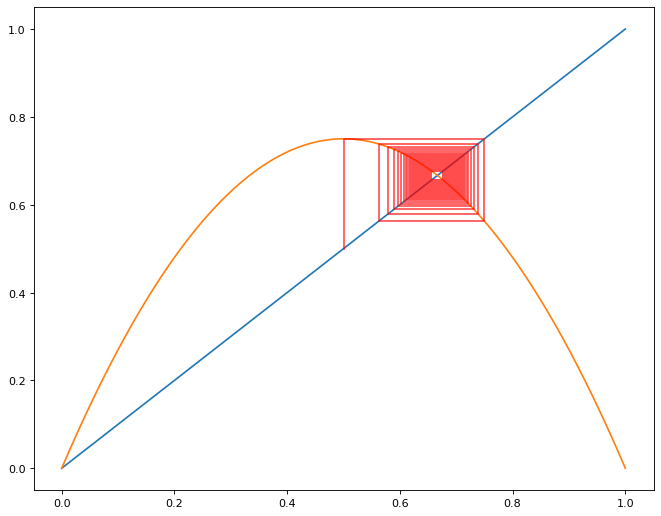

In [120]:
CobWeb(logistic_map, x=.5, r=3, n=1000)


In [123]:
interact(CobWeb ,g=fixed(logistic_map),  x=(.0001,1,.1), r=(0,4,.1), n=fixed(500))


interactive(children=(FloatSlider(value=0.4001, description='x', max=1.0, min=0.0001), FloatSlider(value=2.0, …

<function __main__.CobWeb(g, x, r, n=20)>

In [66]:
A

[0.5,
 0.5,
 0.025,
 0.025,
 0.0024375000000000004,
 0.0024375000000000004,
 0.00024315585937500003,
 0.00024315585937500003,
 2.4309673460305166e-05,
 2.4309673460305166e-05,
 2.430908250008142e-06,
 2.430908250008142e-06,
 2.430902340693222e-07,
 2.430902340693222e-07,
 2.4309017497646033e-08,
 2.4309017497646033e-08,
 2.4309016906717706e-09,
 2.4309016906717706e-09,
 2.4309016847624875e-10,
 2.4309016847624875e-10,
 2.4309016841715593e-11]

In [67]:
B

[0.5,
 0.025,
 0.025,
 0.0024375000000000004,
 0.0024375000000000004,
 0.00024315585937500003,
 0.00024315585937500003,
 2.4309673460305166e-05,
 2.4309673460305166e-05,
 2.430908250008142e-06,
 2.430908250008142e-06,
 2.430902340693222e-07,
 2.430902340693222e-07,
 2.4309017497646033e-08,
 2.4309017497646033e-08,
 2.4309016906717706e-09,
 2.4309016906717706e-09,
 2.4309016847624875e-10,
 2.4309016847624875e-10,
 2.4309016841715593e-11,
 2.4309016841715593e-11]

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [ ]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

<img src="./bifurcacion.png"/>

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>